In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/converted_test_2020_06_24_14-47-10.csv',parse_dates=['Flight_Date','Request_Date'])

In [25]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-06-03 11:00:00,2019-07-02 07:00:00,692.0,7,2019-07-02 FR 145,STN-SXF,FR 145,26.87,£,23.811657,Monday,AM
1,1,2019-06-03 23:00:00,2019-07-02 07:00:00,680.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,34.968663,Monday,PM
2,2,2019-06-04 11:00:00,2019-07-02 07:00:00,668.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,35.016015,Tuesday,AM
3,3,2019-06-04 23:00:00,2019-07-02 07:00:00,656.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,35.016015,Tuesday,PM
4,4,2019-06-05 11:00:00,2019-07-02 07:00:00,644.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,34.973793,Wednesday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,5578,2019-07-30 23:00:00,2019-08-02 22:00:00,71.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,42.83,€,42.830000,Tuesday,PM
5579,5579,2019-07-31 11:00:00,2019-08-02 22:00:00,59.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Wednesday,AM
5580,5580,2019-07-31 23:00:00,2019-08-02 22:00:00,47.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Wednesday,PM
5581,5581,2019-08-01 11:00:00,2019-08-02 22:00:00,35.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Thursday,AM


In [26]:
data.dtypes

Unnamed: 0                   int64
Request_Date        datetime64[ns]
Flight_Date         datetime64[ns]
Duration_Time              float64
Departure_hour               int64
flight_unique_id            object
route_abb                   object
flight_number               object
Price                      float64
Currency                    object
price_in_eur               float64
Request_Weekday             object
Request_AM_PM               object
dtype: object

In [27]:
data.Request_Date.min()

Timestamp('2019-06-03 11:00:00')

In [62]:
data.Request_Date.max()

Timestamp('2019-08-01 23:00:00')

### The data shows the total number of price requests and unique number of price changes per route from 03.06.19-01.08.19.
### It shows the min, max, mean prices for each route and the max difference of price changes per route.

In [54]:
print("Route FRA-STN: 786 price requests, 68 price changes, max. price difference: 242.14€") 
print("Route STN-FRA: 1250 price requests, 588 price changes, max. price difference: 223.05€")
print("Route STN-SXF: 2021 different flights, 555 price changes, max. price difference: 187.91€")
print("Route SXF-STN: 1526 different flights, 66 price changes, max. price difference: 285.83€")

Route FRA-STN: 786 price requests, 68 price changes, max. price difference: 242.14€
Route STN-FRA: 1250 price requests, 588 price changes, max. price difference: 223.05€
Route STN-SXF: 2021 different flights, 555 price changes, max. price difference: 187.91€
Route SXF-STN: 1526 different flights, 66 price changes, max. price difference: 285.83€


In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.groupby(['route_abb', 'flight_number', 'flight_unique_id', 'Request_Date']).size()

route_abb  flight_number  flight_unique_id    Request_Date       
FRA-STN    FR 1546        2019-07-02 FR 1546  2019-06-03 11:00:00    1
                                              2019-06-03 23:00:00    1
                                              2019-06-04 11:00:00    1
                                              2019-06-04 23:00:00    1
                                              2019-06-05 11:00:00    1
                                                                    ..
SXF-STN    FR 8545        2019-08-02 FR 8545  2019-07-30 23:00:00    1
                                              2019-07-31 11:00:00    1
                                              2019-07-31 23:00:00    1
                                              2019-08-01 11:00:00    1
                                              2019-08-01 23:00:00    1
Length: 5583, dtype: int64

In [47]:
#number of flights per route
data.groupby('route_abb').flight_number.size()

route_abb
FRA-STN     786
STN-FRA    1250
STN-SXF    2021
SXF-STN    1526
Name: flight_number, dtype: int64

In [50]:
# data show which flights belong to which route 
data.groupby('route_abb').flight_number.unique()

route_abb
FRA-STN                    [FR 1546, FR 1686]
STN-FRA                    [FR 1687, FR 1547]
STN-SXF    [FR 145, FR 8544, FR 8542, FR 147]
SXF-STN    [FR 8545, FR 8543, FR 144, FR 146]
Name: flight_number, dtype: object

In [14]:
# number of flights per route 
data.groupby('route_abb').flight_unique_id.nunique()

route_abb
FRA-STN     9
STN-FRA    14
STN-SXF    25
SXF-STN    17
Name: flight_unique_id, dtype: int64

In [39]:
##number of price changes aggregated over each route 
price_route = data.groupby('route_abb').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])
price_route = pd.DataFrame(price_route) 
#price_route

In [55]:
# calculates the difference between the min and max price for each route
max_price_change_route = price_route['max'] - price_route['min']
price_route['max_price_change'] = max_price_change_route
price_route

,count,nunique,min,max,mean,max_price_change
route_abb,,,,,,
FRA-STN,786,68,19.990000,262.130000,65.539186,242.140000
STN-FRA,1250,588,16.083959,239.129779,72.976538,223.045819
STN-SXF,2021,555,19.618279,207.529888,99.796225,187.911609
SXF-STN,1526,66,9.990000,295.820000,69.213014,285.830000


In [57]:
%matplotlib inline

In [58]:
sns.set(rc={'figure.figsize':(11, 4)})

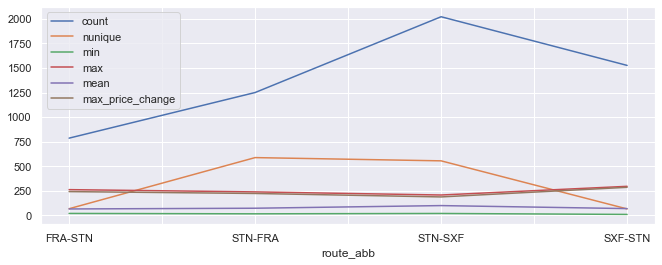

In [59]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot()

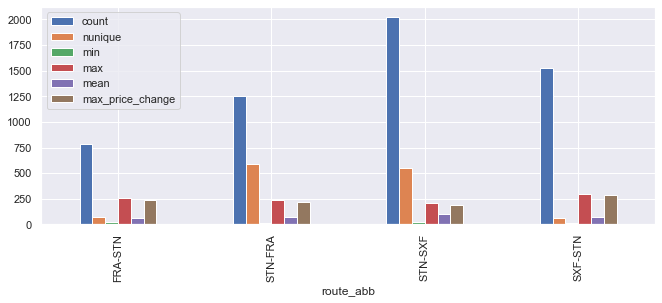

In [63]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot(kind = 'bar')

### The data shows the number of price requests and unique number of price changes per flight with same flight number from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per flight. 

In [64]:
##number of price changes aggregated over each flight number 
price_flight_number = data.groupby('flight_number').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])
price_flight_number = pd.DataFrame(price_flight_number) 

In [65]:
# calculates the difference between the min and max price for each flight
max_price_difference_flight = price_flight_number['max'] - price_flight_number['min']
price_flight_number['max_price_change'] = max_price_difference_flight
price_flight_number

,count,nunique,min,max,mean,max_price_change
flight_number,,,,,,
FR 144,283,30,9.990000,152.990000,45.593216,143.000000
FR 145,553,244,19.618279,203.730392,97.360125,184.112114
FR 146,213,21,19.990000,262.130000,107.683991,242.140000
FR 147,562,270,26.009485,207.529888,104.607671,181.520403
FR 1546,337,47,19.990000,262.130000,72.977953,242.140000
FR 1547,509,315,20.988246,238.604703,69.523037,217.616456
FR 1686,449,54,19.990000,219.290000,59.955969,199.300000
FR 1687,741,429,16.083959,239.129779,75.348780,223.045819
FR 8542,394,228,23.939289,203.730392,94.487028,179.791103


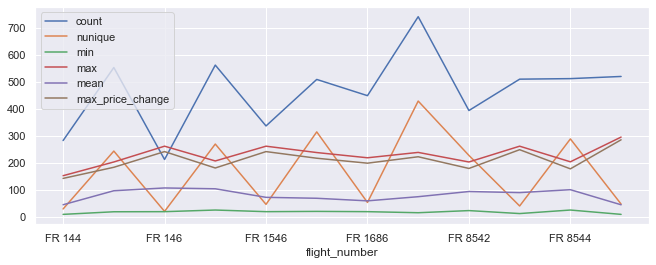

In [66]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
price_flight_number.plot()

### The data shows the number of price requests and unique number of price changes per unique flight from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per unique flight. 

In [69]:
##number of price changes aggregated over each unique flight id
price_flight_id = data.groupby('flight_unique_id').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])
price_flight_id = pd.DataFrame(price_flight_id) 

In [70]:
# calculates the difference between the min and max price for each flight id
max_price_difference_flight_id = price_flight_id['max'] - price_flight_id['min']
price_flight_id['max_price_change'] = max_price_difference_flight_id
price_flight_id.reset_index(inplace=True)
price_flight_id

,flight_unique_id,count,nunique,min,max,mean,max_price_change
0,2019-07-02 FR 145,54,41,19.618279,203.005817,58.340626,183.387538
1,2019-07-02 FR 1546,49,15,30.330000,262.130000,95.370816,231.800000
2,2019-07-03 FR 8545,59,12,14.990000,262.130000,77.175932,247.140000
3,2019-07-04 FR 8544,59,46,33.097624,203.005817,81.704206,169.908193
4,2019-07-05 FR 8542,62,50,23.939289,203.220925,74.333521,179.281636
5,2019-07-05 FR 8544,62,48,43.878551,203.220925,105.407240,159.342375
6,2019-07-07 FR 1687,60,51,29.283682,114.030881,59.815788,84.747198
7,2019-07-07 FR 8543,57,7,73.430000,262.130000,152.560526,188.700000
8,2019-07-08 FR 8543,65,10,61.190000,262.130000,127.458615,200.940000
9,2019-07-08 FR 8544,67,48,29.259563,203.220925,84.653683,173.961362


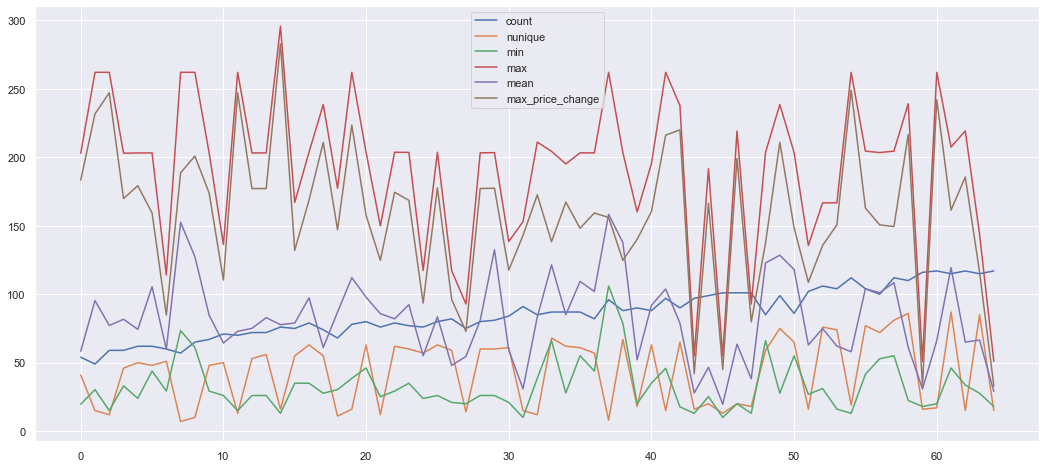

In [71]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
sns.set(rc={'figure.figsize':(18, 8)})
price_flight_id.plot()

# Plots with pricing for specific flights

In [82]:
#format the request date to YYYY-mm-dd 
calc_request_dates = data.Request_Date.apply(lambda x: x.strftime('%Y-%m-%d'))
calc_request_dates

0       2019-06-03
1       2019-06-03
2       2019-06-04
3       2019-06-04
4       2019-06-05
           ...    
5578    2019-07-30
5579    2019-07-31
5580    2019-07-31
5581    2019-08-01
5582    2019-08-01
Name: Request_Date, Length: 5583, dtype: object

In [85]:
#filter for specific day with boolean indexing
filter_day = (calc_request_dates == '2019-06-03')
filter_day

0        True
1        True
2       False
3       False
4       False
        ...  
5578    False
5579    False
5580    False
5581    False
5582    False
Name: Request_Date, Length: 5583, dtype: bool

In [86]:
#only select the true values
true_date_values = data[filter_day]
true_date_values

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-06-03 11:00:00,2019-07-02 07:00:00,692.0,7,2019-07-02 FR 145,STN-SXF,FR 145,26.87,£,23.811657,Monday,AM
1,1,2019-06-03 23:00:00,2019-07-02 07:00:00,680.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,34.968663,Monday,PM
54,54,2019-06-03 11:00:00,2019-07-02 18:00:00,703.0,18,2019-07-02 FR 1546,FRA-STN,FR 1546,30.33,€,30.330000,Monday,AM
55,55,2019-06-03 23:00:00,2019-07-02 18:00:00,691.0,18,2019-07-02 FR 1546,FRA-STN,FR 1546,30.33,€,30.330000,Monday,PM
103,103,2019-06-03 11:00:00,2019-07-03 22:00:00,731.0,22,2019-07-03 FR 8545,SXF-STN,FR 8545,22.17,€,22.170000,Monday,AM
104,104,2019-06-03 23:00:00,2019-07-03 22:00:00,719.0,22,2019-07-03 FR 8545,SXF-STN,FR 8545,22.17,€,22.170000,Monday,PM
162,162,2019-06-03 11:00:00,2019-07-04 19:00:00,752.0,19,2019-07-04 FR 8544,STN-SXF,FR 8544,39.46,£,34.968663,Monday,AM
163,163,2019-06-03 23:00:00,2019-07-04 19:00:00,740.0,19,2019-07-04 FR 8544,STN-SXF,FR 8544,52.01,£,46.090222,Monday,PM
221,221,2019-06-03 11:00:00,2019-07-05 06:00:00,763.0,6,2019-07-05 FR 8542,STN-SXF,FR 8542,33.04,£,29.279387,Monday,AM
222,222,2019-06-03 23:00:00,2019-07-05 06:00:00,751.0,6,2019-07-05 FR 8542,STN-SXF,FR 8542,33.04,£,29.279387,Monday,PM


In [87]:
##number of price changes aggregated over each route on a specific day
price_change_day = true_date_values.groupby(true_date_values.flight_number == 'FR 147').price_in_eur.value_counts()
price_change_day = pd.DataFrame(price_change_day) 
price_change_day

price_in_eur
flight_number price_in_eur              
False         14.990000                8
              34.968663                8
              55.129258                8
              22.170000                7
              61.190000                7
              26.027107                6
              46.090222                5
              65.976101                5
              78.630751                5
              30.330000                4
              36.918259                4
              38.550000                4
              44.645748                4
              19.990000                3
              21.002466                3
              23.811657                3
              29.279387                3
              35.540000                3
              45.890000                3
              25.130000                2
              27.648816                2
              31.087194                2
              48.440000                2
              56.033161                2
              152.990000               2
              28.550000                1
              40.790000                1
              73.430000                1
              94.901016                1
              106.070000               1
              126.470000               1
True          26.027107                3
              46.090222                3
              55.129258                2
              78.630751                2
              137.384485               2

In [90]:
price_change_day_agg = true_date_values.groupby(true_date_values.flight_number == 'FR 147').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean'])

In [91]:
# calculates the difference between the min and max price for a specific flight number on a specific day
# the price changes 5 times for the flight FR 147 on the 2019-06-03
max_price_change_day = price_change_day_agg['max'] - price_change_day_agg['min']
price_change_day_agg['max_price_change'] = max_price_change_day
price_change_day_agg

,count,nunique,min,max,mean,max_price_change
flight_number,,,,,,
False,111,31,14.990000,152.990000,43.378895,138.000000
True,12,5,26.027107,137.384485,63.220081,111.357379


In [99]:
price_flight_1546 = data.groupby(data.flight_unique_id == '2019-07-02 FR 1546').price_in_eur.unique()
price_flight_1546 = pd.DataFrame(price_flight_1546) 
price_flight_1546

,price_in_eur
flight_unique_id,
False,"[23.811656600000003, 34.9686628, 35.0160148, 3..."
True,"[30.33, 38.55, 36.4, 45.89, 55.07, 92.81, 110...."


In [98]:
# calculates the difference between the min and max price for each route
max_price_difference_1546 = price_flight_1546['max'] - price_flight_1546['min']
price_flight_1546['max_diff'] = max_price_difference_1546
price_flight_1546

KeyError: 'max'

In [424]:
##the price changes 5 times for the flight 2019-09-10 FR 8543
df = data.groupby(data.flight_unique_id=='2019-09-10 FR 8543')['price_in_eur'].unique()
df

flight_unique_id
False    [73.43, 180.53, 61.19, 152.99, 50.99, 42.83, 2...
True                   [12.99, 29.57, 35.69, 46.83, 39.69]
Name: price_in_eur, dtype: object

In [425]:
##the values of the price changes for flight 2019-09-10 FR 8543, look at the True values
##the min = 12.99 and max = 46.83
test = data.groupby(data.flight_unique_id =='2019-09-10 FR 8543').price_in_eur.value_counts()
test

flight_unique_id  price_in_eur
False             50.990000       205
                  106.070000      195
                  88.730000       180
                  73.430000       169
                  75.470000       168
                  126.470000      168
                  61.190000       148
                  152.990000      141
                  62.210000       114
                  91.790000        97
                  42.830000        93
                  35.690000        90
                  180.530000       86
                  111.170000       72
                  132.590000       69
                  29.570000        63
                  211.130000       59
                  157.070000       55
                  262.130000       48
                  41.810000        45
                  18.291850        44
                  18.315438        43
                  28.962030        41
                  18.220885        40
                  16.270696        39
                  2

flight_unique_id
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

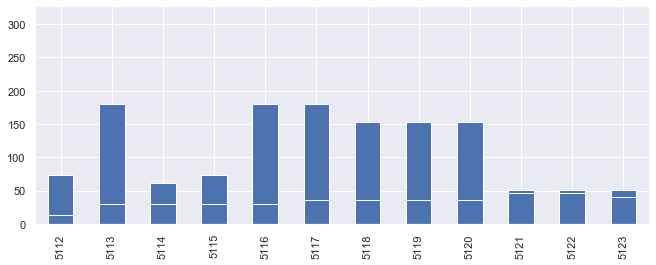

In [16]:
data.groupby(data.flight_unique_id=='2019-09-10 FR 8543').price_in_eur.plot(kind='bar')

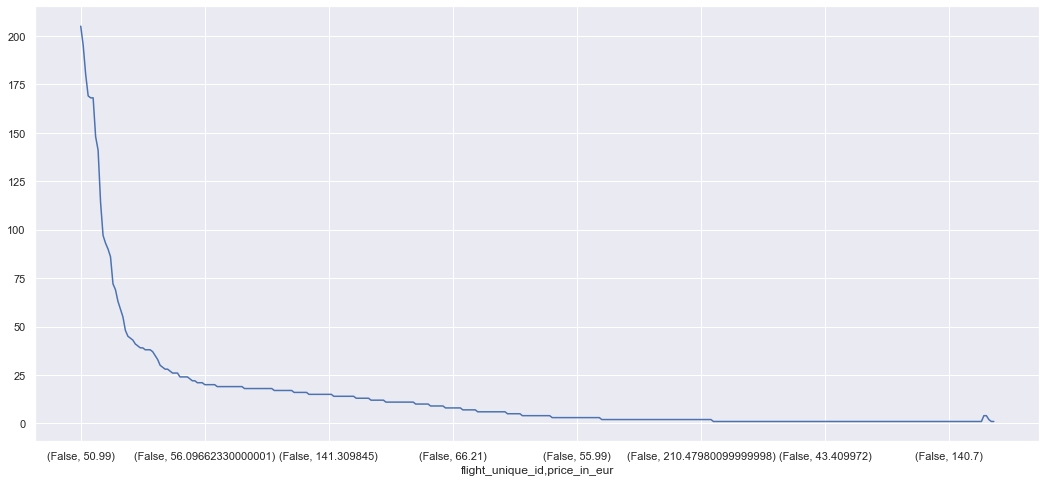

In [426]:
##data.price_in_eur.value_counts().sort_index().plot()
test.plot()

In [22]:
#data['route_abb_num'] = data.route_abb.map({'FRA-STN':0, 'STN-FRA':1, 'STN-SXF':2, 'SXF-STN':3})

flight_number
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

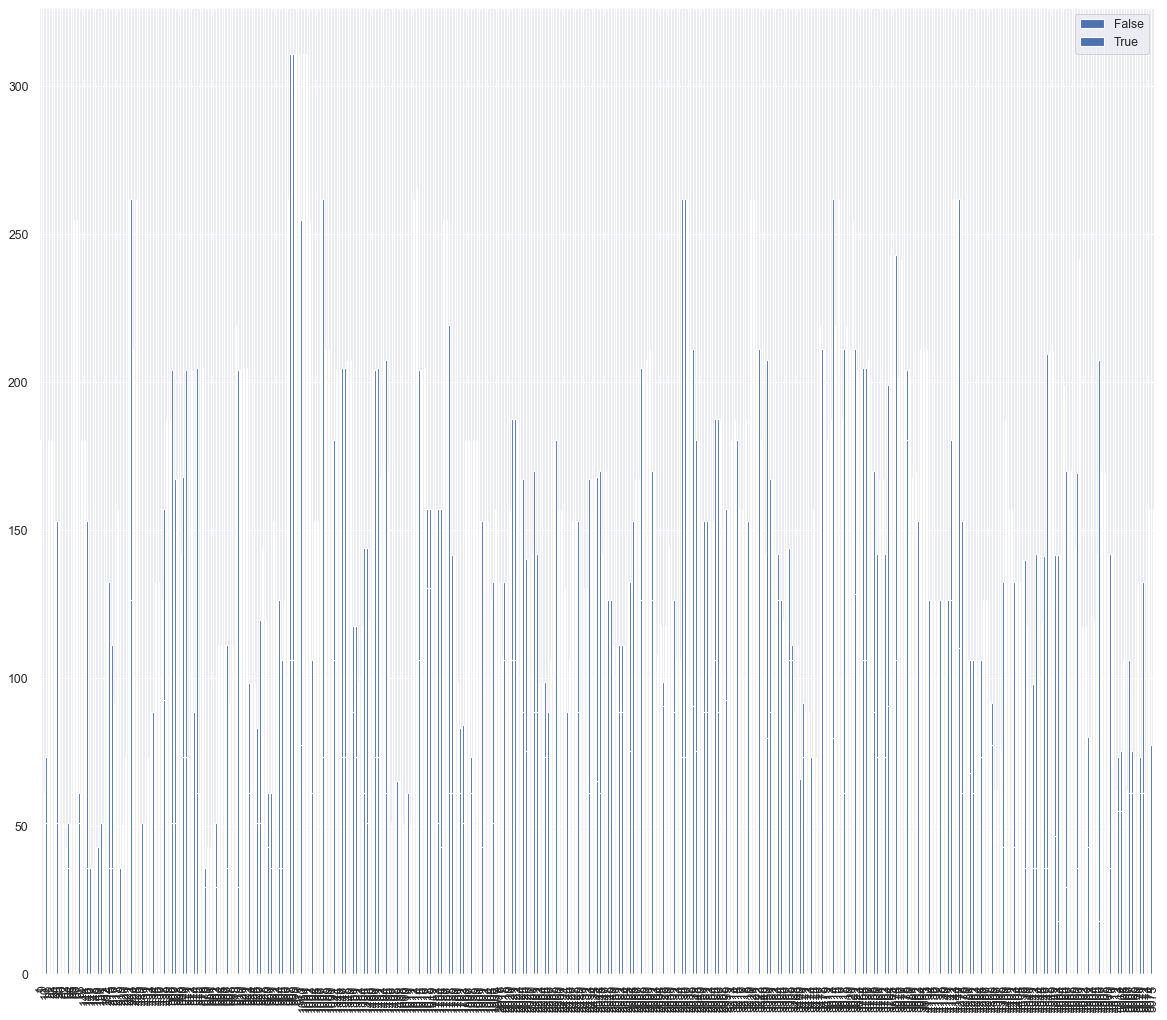

In [427]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
data.groupby(data.flight_number=='FR 8545').price_in_eur.plot(kind='bar', legend=True)

# Plot for pricing at AM and PM

In [428]:
data['Request_AM_PM_num'] = data.Request_AM_PM.map({'AM':0, 'PM':1})

In [429]:
data.loc[0:4, ['Request_AM_PM', 'Request_AM_PM_num']]

,Request_AM_PM,Request_AM_PM_num
0,AM,0
1,AM,0
2,AM,0
3,PM,1
4,AM,0


# Plot time and price

The average price for the period between request and flight


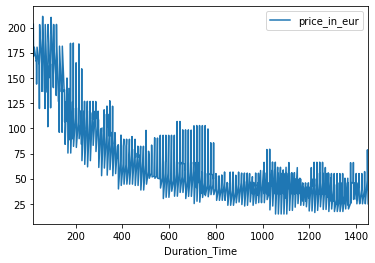

In [13]:
print("The average price for the period between request and flight")
fig, ax = plt.subplots()
df = data.groupby(['Duration_Time'])[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight


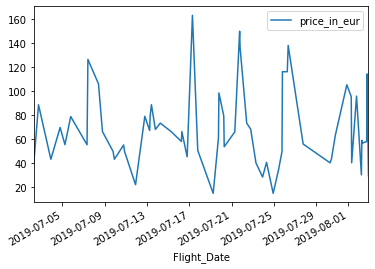

In [12]:
print("The average price for the time of the flight")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date'],)[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route


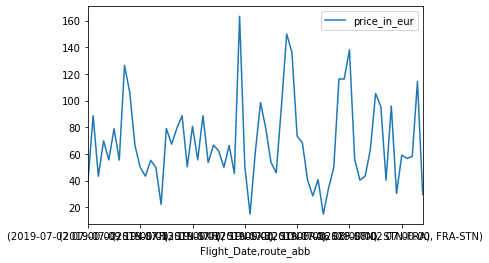

In [11]:
print("The average price for the time of the flight and same route")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

Plot how many flights per route


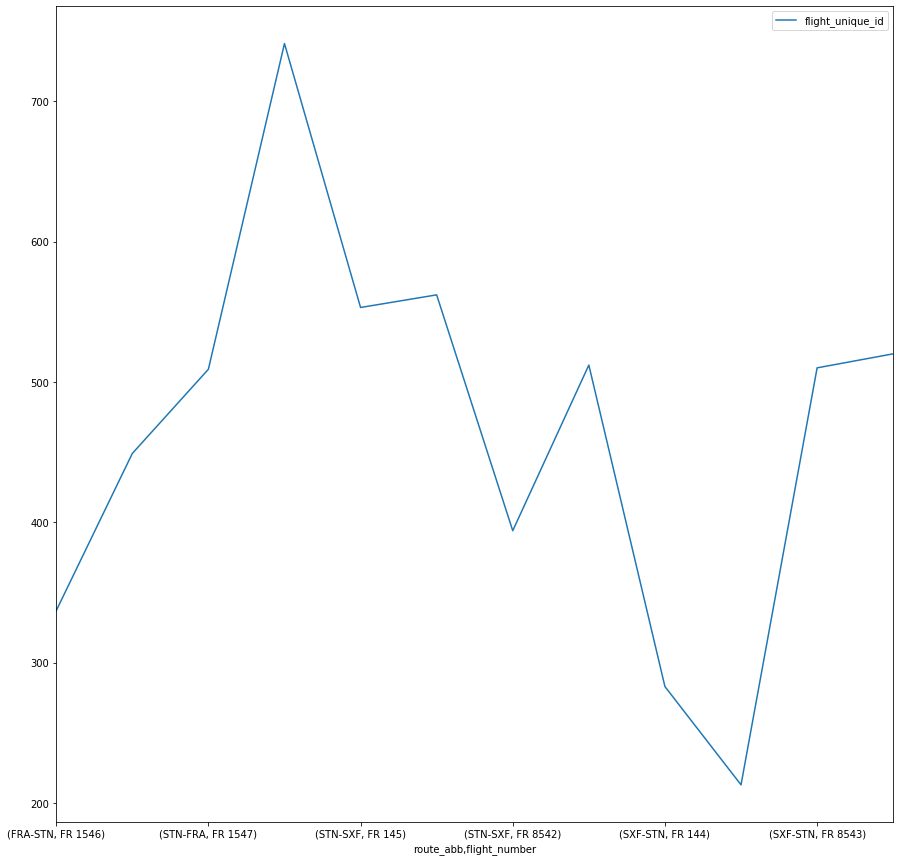

In [8]:
print("Plot how many flights per route")
fig, ax = plt.subplots()
df = data.groupby(['route_abb','flight_number']).count()['flight_unique_id'].plot(ax=ax, figsize=[15, 15])
ax.legend()
plt.show()

The average price for the period between request and flight in euro


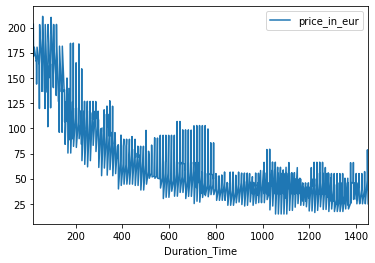

In [9]:
print("The average price for the period between request and flight in euro")
fig, ax = plt.subplots() 
df = data.groupby(['Duration_Time'])[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route in euro


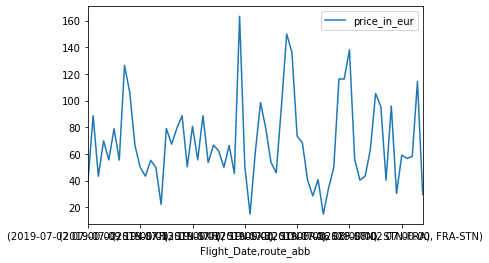

In [10]:
print("The average price for the time of the flight and same route in euro")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()